<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

accuracy on 1 fold: 1.0


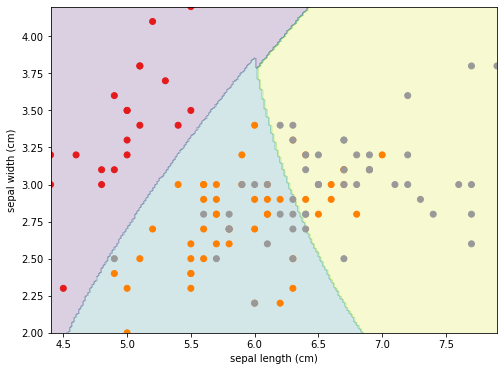

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

accuracy on 2 fold: 0.8


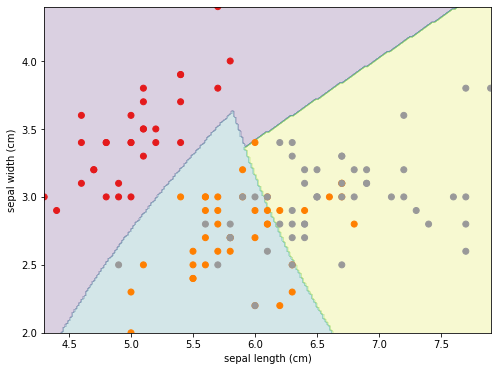

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

accuracy on 3 fold: 0.3333333333333333


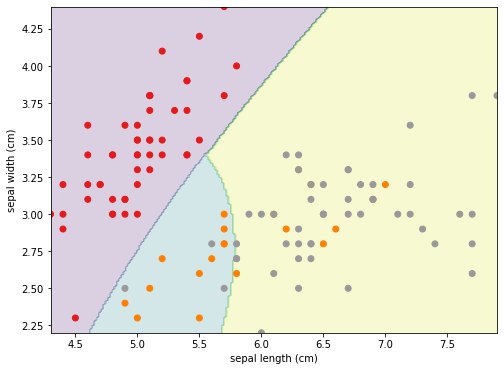

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

accuracy on 4 fold: 0.7333333333333333


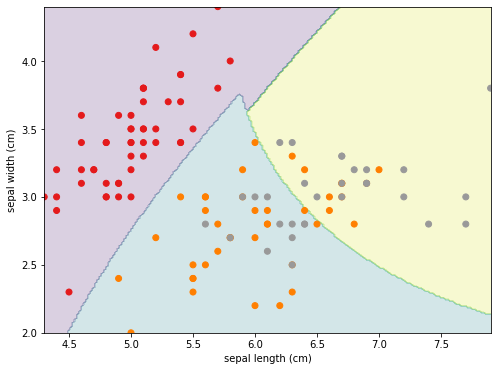

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

accuracy on 5 fold: 0.2


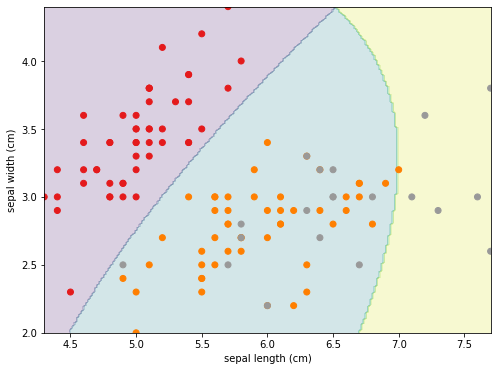

<IPython.core.display.Javascript object>

avg acc: 0.6133333333333334


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from google.colab import widgets ## 用於製作以下的 tab 標籤輸出

#Set data
svm_clf_poly = SVC(kernel='poly')
data = load_iris(as_frame = True) ## 讀取資料集
inputs = np.array(data.data[['sepal length (cm)', 'sepal width (cm)']])
labels = np.array(data.target)

#initialize
counter = 0
caculation = 0

tb = widgets.TabBar(['1Fold', '2Fold', '3Fold', '4Fold', '5Fold'])
kf = KFold(n_splits=5)

for train, test in kf.split(inputs):
  with tb.output_to(counter):

    x_train, x_test, y_train, y_test = inputs[train], inputs[test], labels[train], labels[test]
    svm_clf_poly.fit(x_train, y_train)
    svm_pre = svm_clf_poly.predict(x_test)
    caculation = caculation + accuracy_score(y_test, svm_pre)

    fig = plt.figure(figsize=(8, 6))
    # prepare for contour，先畫地板
    resolution = 200
    dx = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), resolution) 
    dy = np.linspace(np.min(x_train[:, 1]), np.max(x_train[:, 1]), resolution)
    dx, dy = np.meshgrid(dx, dy)

    # merge dx, dy to test_x，預測地板類別
    test_x = np.c_[dx.flatten(), dy.flatten()]
    z = svm_clf_poly.predict(test_x)
    z = z.reshape(dx.shape)
    
    # draw，畫有類別的地板
    plt.contourf(dx, dy, z, alpha=0.2)
    
    ## 以前兩個維度繪製資料點
    plt.scatter(x_train[:,0], x_train[:,1], c = y_train, cmap = 'Set1')
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    print('accuracy on', counter+1, 'fold:', accuracy_score(y_test, svm_pre))
    plt.show()

    counter = counter +1

print('avg acc:', caculation/5)